# Part II - Airport Data Explanation
## by Sidney D. Osborn

## Investigation Overview & Summary of Finding from Part I

> This is a summary of my main findings from Part I of my data exploration:
- As the data columns are mostly numerical, I decided to use several histograms and scatterplots to emphasize the relationships between vriables. I focused mostly on plotting other variables against total flght dalays or sometimes total flights. It is worth noting that many of the numerical variables are subsets of the toal flights variable, and thus will be tied into them. Nevertheless, see the breakdown by things like delays due to late aircraft or security checks was useful to see in plotted form, especially when logarithmically transformed. This seems true for the variables that report time lost (in minutes), as well against total delay time lost.
- I plotted total delays against total flights. Not surprisingly, the correlation was positive.
- I plotted total flight delays against simlar yet unrelated categories such as cancellations and diversions. We see fewer cancellations compared to delays and even fewer diversions. I am not personally familiar with airline logistics, but it would be interesting to see if these breakdowns match the usual statistics we see in the airline industry in the United States and abroad.
- When doing box and violin plots for carrier delays, we see that all the carrier report fewerr than 500 delays for the timeframe of the dataset, although it isn't impossible to see a handful of much higher numbers. This latter spread of outliers is where we see the most variation within the carriers.
- The interesting pattern in the Total Flights histograms and other items of interest noted throughout my report can be expanded on in future investigations.
- Finally, when we plot total delay time count against all of the subcategory variables like weather, security, etc., delays to see how they compare using a plit matrix. WHen the x-axis variable is log-transformed, we see all of the variables increase as the x-axis magnitude increases. However, the first column of plots shown in the untransformed plot may be more useful, as it shows the direct breakdwon of delay subcaetegory plotted against total delays. The correlations calculated seem to confirm this finding.

> My goals for this explanatory data analysis:
- I think I would like to bring forward the total flights arrived vs. total delays scatterplot, the plot matrix for total delays plotted against all of the delay subcategories and the box plot for total delays by carrier. I would like to add a few details for them and touch them up to make them more asthetically pleasing and reader-fiendly.
- Specifically, I want to add jitter to the scatterplot, focus and reduce color distraction on the boxplots and add descriptive titles to the plot matrix.
- While there are many insight I would like to communicate, I wanted to communicate my findings for these three items, as they give a good sample of some of the biggest hiccups that can happen within the airline industry.

## Dataset Overview

> This dataset was taken from the U.S. DOT wesite and provides information on airline flight delays, cancellations and other similar information. It covers years 2033-2023.
> There are 21 features in the Airport dataset. with just over 338,000 rows containing information for individual flights.
> Here's a breakdown of what the columns are (in alphabetical order) given by the dataset orignator:
- 'airport': 'Airport Code for Arrival Airport',
- 'airport_name': 'Airport Name',
- 'arr_cancelled': 'Number of cancelled flights',
- 'arr_del15': 'Total number of delayed flights in the observation',
- 'arr_delay': 'Arrival delay in minutes',
- 'arr_diverted': 'Number of flights diverted',
- 'arr_flights': 'Total number of arriving flights in the observation',
- 'carrier': 'Airline carrier abbreviation',
- 'carrier_ct': 'Number of flights delayed due to air carrier (subset of 'arr_del15')',
- 'carrier_delay': 'Carrier delay in minutes (subset of arr_delay)',
- 'carrier_name': 'Airline carrier name',
- 'late_aircraft_ct': 'Number of flights delayed due to a previous flight using the same aircraft being late',
- 'late_aircraft_delay': 'Aircraft delay in minutes (subset of arr_delay)',
- 'month': 'Month (mm)',
- 'nas_ct': 'Number of flights delayed due to National Aviation System (subset 'of arr_del15)',
- 'nas_delay': 'National Aviation System in minutes (subset of arr_delay)',
- 'security_ct': 'Number of flights delayed due to airport security (subset of 'arr_del15)',
- 'security_delay': 'Security delay in minutes (subset of arr_delay)',
- 'weather_ct': 'Number of flights delayed due to weather (subset of arr_del15)',
- 'weather_delay': 'Weather delayed in minutes (subset of arr_delay)',
- 'year': 'Year (yyyy)'

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and drop rows with null values
airports = pd.read_csv('Airline_Delay_Cause.csv')
airports2 = airports.dropna(subset=['arr_flights','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'])

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Total Flights Arrived Vs. Total Flight Delays

> This is a scatterplot detailing how the total flight arrivals to airports in the U.S. compares to the total delays of these flights. (This data reflects this trend from the years 2003-2023.) While the delays are dwarfed by the number of arrivals in general, there is a positive correlation.

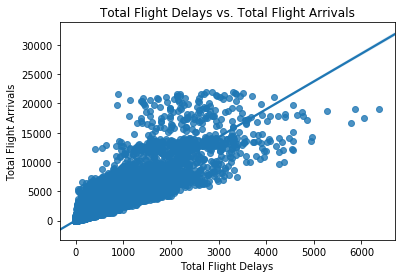

In [3]:
#plot total fight delays vs. total flight arrivals
#Polished by add x- and y-jittering (though jittering doesnt seem to help much)
sns.regplot(data = airports2, x = 'arr_del15', y = 'arr_flights', x_jitter = 20, y_jitter = 20)
plt.xlabel('Total Flight Delays')
plt.ylabel('Total Flight Arrivals')
plt.title('Total Flight Delays vs. Total Flight Arrivals');

## Delays By Airline Carrier

> As you can see, the total number of delays by carrier is generally lower than 100 delays per carrier. The carrier with the most delays is Carrier "WN." Be careful if you choose to book with them, as they may have poor logistics if they have more than triple the delays of their competitiors!

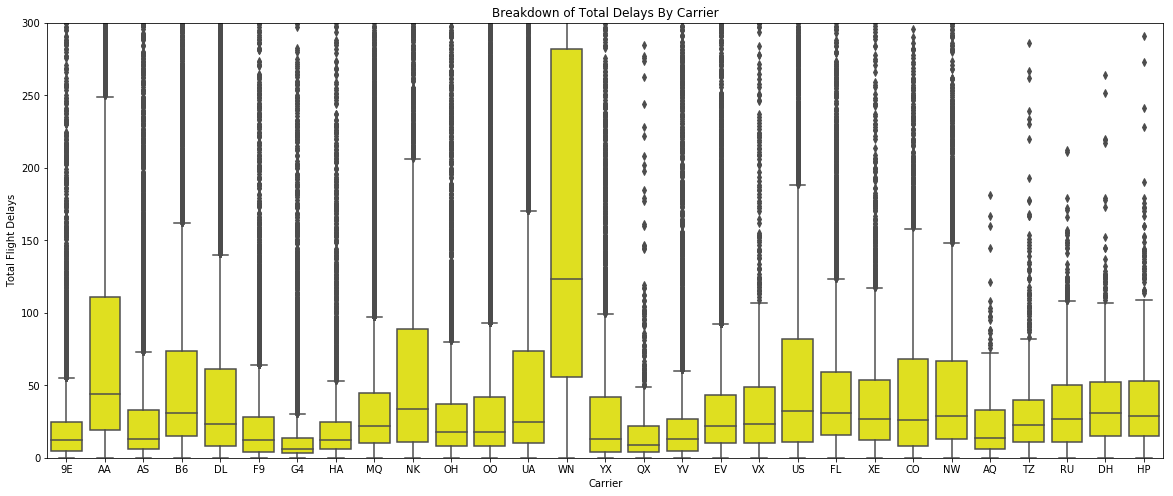

In [4]:
#box plot of total delays by carrier
#Polished by limiting the y-axis to 300 so the boxplots are more evdient. Changed color to yellow to eliminate distracting
#rainbow colors so it would increase the data to ink ratio
plt.figure(figsize = [20, 8])
sns.boxplot(data=airports2, x='carrier', y='arr_del15', color = "yellow")
plt.xlabel('Carrier')
plt.ylabel('Total Flight Delays')
plt.title('Breakdown of Total Delays By Carrier')
plt.ylim([0,300]);

## Comparison of Total Arrival Delays and Associated Subcategories

> As you can see from the plot matrix below, many of the delay subcategories are positively correlated with the total number of flight arrival delays. This is most evident in the scatterplots in the left hand-most column.

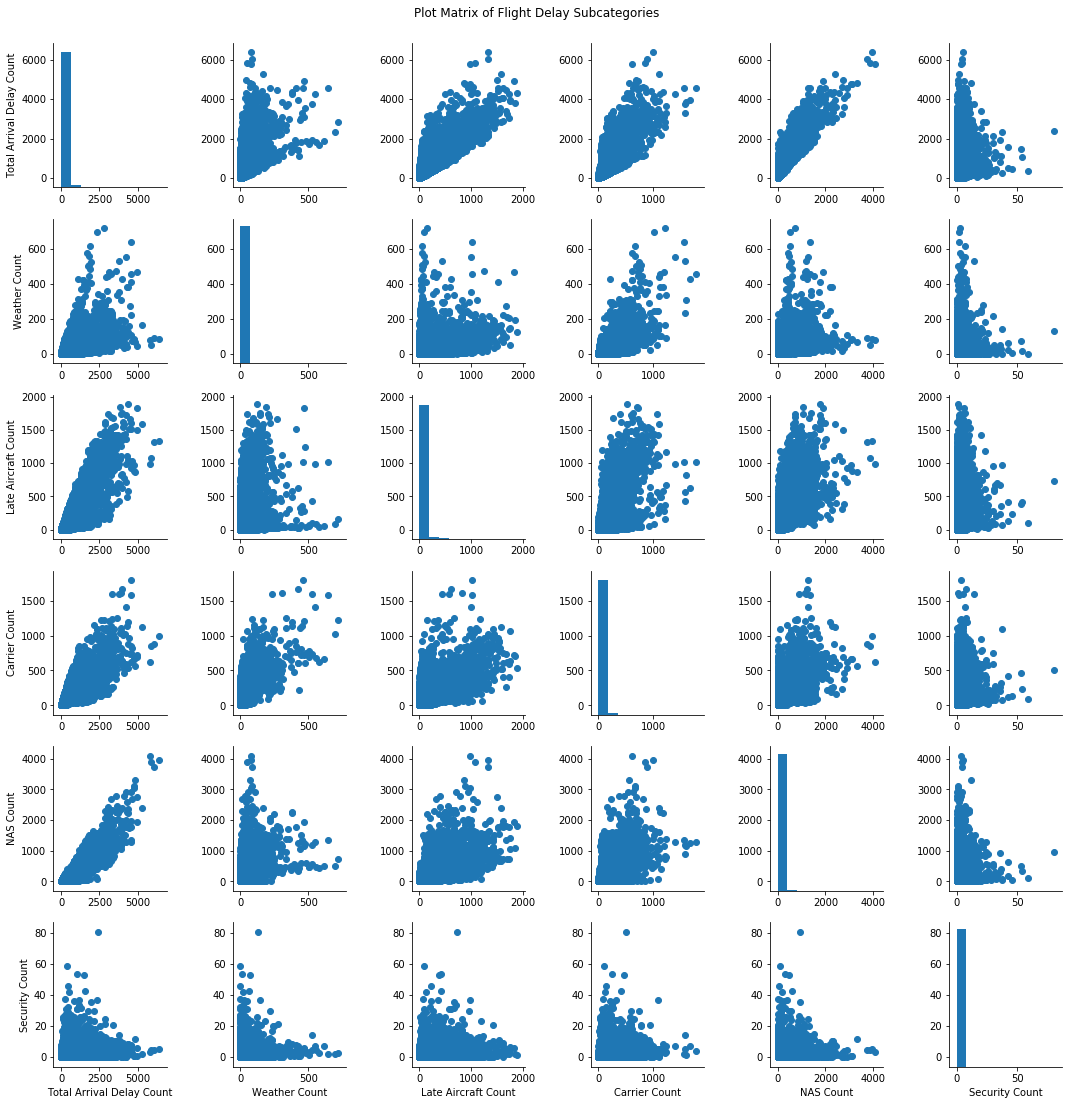

In [5]:
#use a plot matrix to look at everything at once!
#polished by adding descriptive labels to the axes and a descriptive title
#ChatGPT helped me with some of the axes-labeling loop
variables = ['arr_del15', 'weather_ct', 'late_aircraft_ct', 'carrier_ct', 'nas_ct', 'security_ct']
custom_labels = {
    'arr_del15': 'Total Arrival Delay Count',
    'weather_ct': 'Weather Count',
    'late_aircraft_ct': 'Late Aircraft Count',
    'carrier_ct': 'Carrier Count',
    'nas_ct': 'NAS Count',
    'security_ct': 'Security Count'
}
g = sns.PairGrid(data = airports2, vars = variables);
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)
#customize the axis labels using the custom_labels dictionary
for i, variable in enumerate(variables):
    g.axes[len(variables) - 1, i].set_xlabel(custom_labels[variable])  # Set X-axis label for the last row
    g.axes[i, 0].set_ylabel(custom_labels[variable])  # Set Y-axis label for the first column
g.fig.suptitle('Plot Matrix of Flight Delay Subcategories', y = 1.02) # Add a descriptive title with offset
plt.tight_layout();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [6]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Airort_Data_Explanation>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Airort_Data_Explanation: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
